You can download the full dataset from [here](https://www.kaggle.com/borismarjanovic/price-volume-data-for-all-us-stocks-etfs) 

Installing tensorflow version 2

In [14]:
!pip install -q tf-nightly-2.0-preview

In [3]:
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf
import numpy as np
import pandas as pd

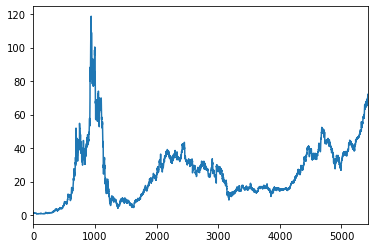

In [5]:
pdf = pd.read_csv("aaba.us.txt")
pdf['Close'].plot()

Following funcitons are used for building the series

In [6]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    dataset = tf.data.Dataset.from_tensor_slices(series)
    dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)
    dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))
    dataset = dataset.shuffle(shuffle_buffer).map(lambda window: (window[:-1], window[-1]))
    dataset = dataset.batch(batch_size).prefetch(1)
    return dataset

In [7]:
def windowed_dataset_test(series, window_size):
    dataset = tf.data.Dataset.from_tensor_slices(series)
    dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)
    dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))
    dataset = dataset.map(lambda window: (window[:-1][np.newaxis], window[-1][np.newaxis]))
    return dataset

In [8]:
series = pdf['Close']
split_time = 4000
x_train = series[:split_time]
x_valid = series[split_time:]

In [15]:
train_set = windowed_dataset(x_train, window_size=100, batch_size=128, shuffle_buffer=128)

model = tf.keras.models.Sequential([
  tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1),
                      input_shape=[None]),
  tf.keras.layers.SimpleRNN(40),
  tf.keras.layers.Dense(1),
])

optimizer = tf.keras.optimizers.Adam(lr=1e-2)
model.compile(loss=tf.keras.losses.MAE,
              optimizer=optimizer,
              metrics=["mae"])
history = model.fit(train_set, epochs=2)

In [0]:
test_set = windowed_dataset_test(x_valid, window_size=100)
y_test = model.predict(test_set)

In [0]:
actual_y = []
for x,y in test_set:
    actual_y.append(y.numpy())
actual_y = np.array(actual_y)

In [16]:
import matplotlib.pyplot as plt

plt.plot(y_test[:,0], 'g')
plt.plot(np.array(actual_y), 'r')


### Exercise 1

Try Deeper RNN network and check the training loss and plot predictions versus actual  


In [0]:
### Your Response here 

In [ ]:
### Your Response here 

In [ ]:
### Your Response here 

### Exercise 2

Try LSTM and GRU network and check the training loss and plot predictions versus actual  


In [ ]:
### Your Response here 

In [ ]:
### Your Response here 

In [ ]:
### Your Response here 

In [ ]:
### Your Response here 